# Exploratory Data Analysis for Broward County

## Load Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
listings = pd.read_csv('C:/Users/bombd/Downloads/listings.csv')

In [3]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,57818,Private house close to the beach!,275948,VonJon,NaN,Hollywood,26.016700,-80.124370,Entire home/apt,200,2,56,2021-10-22,0.56,1,359,15,NaN
1,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.976410,-80.120520,Entire home/apt,110,30,2,2021-03-27,0.04,2,230,1,NaN
2,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.033920,-80.142010,Entire home/apt,99,7,20,2020-01-26,0.16,8,147,0,NaN
3,105411,House in the Ranches,532930,Sonia,NaN,Southwest Ranches,26.046780,-80.368090,Entire home/apt,235,4,5,2012-08-27,0.04,1,144,0,NaN
4,129061,MIAMI - LUXURY APARTMENT OVER BEACH,637272,Bianca,NaN,Hollywood,25.993320,-80.118870,Entire home/apt,243,20,18,2021-03-26,0.16,6,365,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12358,52959486,Las Olas House! Private Cottage deck and garden!,59993505,John,NaN,Fort Lauderdale,26.123370,-80.131430,Entire home/apt,160,1,0,NaN,NaN,1,365,0,NaN
12359,52962576,DREAM-SKY MANSION. 3DBR/3BA LUXURY PENTHOUSE,327859472,Stay Today,NaN,Hallandale Beach,25.984920,-80.121640,Entire home/apt,230,1,0,NaN,NaN,21,339,0,NaN
12360,52963027,Mind Blowing OCEAN VIEW,384099435,Katrina,NaN,Fort Lauderdale,26.177540,-80.096670,Entire home/apt,131,1,0,NaN,NaN,2,203,0,NaN
12361,52968689,Marriott Beach Place Towers Studio king/sofa bed,108147462,Steven & Diana,NaN,Fort Lauderdale,26.123056,-80.104596,Private room,141,3,0,NaN,NaN,1,7,0,NaN


## Exploring the Variables

### What are the different variables in the dataframe? What are their data types?

In [4]:
list(listings.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license']

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12363 entries, 0 to 12362
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12363 non-null  int64  
 1   name                            12363 non-null  object 
 2   host_id                         12363 non-null  int64  
 3   host_name                       12361 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12363 non-null  object 
 6   latitude                        12363 non-null  float64
 7   longitude                       12363 non-null  float64
 8   room_type                       12363 non-null  object 
 9   price                           12363 non-null  int64  
 10  minimum_nights                  12363 non-null  int64  
 11  number_of_reviews               12363 non-null  int64  
 12  last_review                     

### What are the different neighborhoods in Broward County?

In [6]:
list(listings['neighbourhood'].unique())

['Hollywood',
 'Hallandale Beach',
 'Dania Beach',
 'Southwest Ranches',
 'Deerfield Beach',
 'Fort Lauderdale',
 'Pompano Beach',
 'Coral Springs',
 'Miramar',
 'Plantation',
 'Cooper City',
 'Lauderhill',
 'Pembroke Pines',
 'Margate',
 'Tamarac',
 'North Lauderdale',
 'Wilton Manors',
 'Lauderdale By The Sea',
 'Oakland Park',
 'Coconut Creek',
 'Weston',
 'Parkland',
 'Hillsboro Beach',
 'Davie',
 'Lauderdale Lakes',
 'Sea Ranch Lakes',
 'Sunrise',
 'Lighthouse Point',
 'Unincorporated',
 'Pembroke Park',
 'West Park',
 'Lazy Lake',
 'County Regional Facility',
 'Tribal Land']

### Which neighborhood is the most expensive on average?

In [7]:
listings['price'].describe()

count    12363.000000
mean       232.924452
std        383.028041
min          0.000000
25%         95.000000
50%        150.000000
75%        250.000000
max      10873.000000
Name: price, dtype: float64

In [8]:
tempdf = listings.loc[:,['neighbourhood', 'price']]
tempdf

,neighbourhood,price
0,Hollywood,200
1,Hallandale Beach,110
2,Dania Beach,99
3,Southwest Ranches,235
4,Hollywood,243
...,...,...
12358,Fort Lauderdale,160
12359,Hallandale Beach,230
12360,Fort Lauderdale,131
12361,Fort Lauderdale,141


In [9]:
#average price per night for an Airbnb in Broward County
    
tempdf['price'].describe()['mean']


232.9244519938526

In [10]:
tempdf.groupby(['neighbourhood']).agg({'price':['mean']})

,price
,mean
neighbourhood,
Coconut Creek,140.063830
Cooper City,235.277778
Coral Springs,149.904762
County Regional Facility,337.000000
Dania Beach,204.568047
Davie,222.836879
Deerfield Beach,196.487129
Fort Lauderdale,293.046346


<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

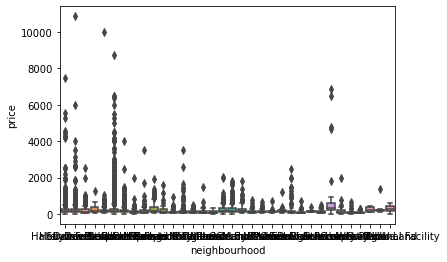

In [11]:
f, ax = plt.subplots()
sns.boxplot(data=tempdf, x="neighbourhood", y="price")
#how do I make this wider?

In [12]:
import pandas as pd
import seaborn as sns

import folium
import matplotlib.pyplot as plt
from folium import plugins
from folium.plugins import HeatMap

heat_data = [[price['latitude'],price['longitude']] for index, price in listings.iterrows()]
map = folium.Map(location=[26.016700,-80.124370], zoom_start = 13,  tiles='CartoDB positron', min_opacity= 5)

# Plot it on the map
HeatMap(heat_data).add_to(map)

# Display the map
map


### Which months have the highest prices?

In [13]:
calendar = pd.read_csv("C:/Users/bombd/Downloads/calendar.csv", delimiter=',')
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,57818,2021-10-26,f,$200.00,$200.00,2.0,30.0
1,256386,2021-10-26,t,$89.00,$89.00,2.0,365.0
2,256386,2021-10-27,t,$89.00,$89.00,2.0,365.0
3,256386,2021-10-28,f,$115.00,$115.00,2.0,365.0
4,256386,2021-10-29,f,$115.00,$115.00,2.0,365.0
...,...,...,...,...,...,...,...
4512623,52526444,2022-10-21,t,$90.00,$78.00,1.0,14.0
4512624,52526444,2022-10-22,t,$90.00,$78.00,1.0,14.0
4512625,52526444,2022-10-23,t,$90.00,$78.00,1.0,14.0
4512626,52526444,2022-10-24,t,$90.00,$78.00,1.0,14.0


In [14]:
calendar['date'] = pd.to_datetime(calendar['date'],format="%Y-%m-%d")
type(calendar['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month
calendar['year-month'] = calendar['date'].dt.to_period('M')

In [16]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,year-month
0,57818,2021-10-26,f,$200.00,$200.00,2.0,30.0,2021,10,2021-10
1,256386,2021-10-26,t,$89.00,$89.00,2.0,365.0,2021,10,2021-10
2,256386,2021-10-27,t,$89.00,$89.00,2.0,365.0,2021,10,2021-10
3,256386,2021-10-28,f,$115.00,$115.00,2.0,365.0,2021,10,2021-10
4,256386,2021-10-29,f,$115.00,$115.00,2.0,365.0,2021,10,2021-10
...,...,...,...,...,...,...,...,...,...,...
4512623,52526444,2022-10-21,t,$90.00,$78.00,1.0,14.0,2022,10,2022-10
4512624,52526444,2022-10-22,t,$90.00,$78.00,1.0,14.0,2022,10,2022-10
4512625,52526444,2022-10-23,t,$90.00,$78.00,1.0,14.0,2022,10,2022-10
4512626,52526444,2022-10-24,t,$90.00,$78.00,1.0,14.0,2022,10,2022-10


In [17]:
calendar['price']= calendar['price'].replace('[$,]', '', regex=True).astype(float)

In [18]:
tempcal = calendar.groupby(['year-month']).agg({'price':['median']})
tempcal

,price
,median
year-month,
2021-10,150.0
2021-11,159.0
2021-12,185.0
2022-01,190.0
2022-02,190.0
2022-03,193.0
2022-04,180.0
2022-05,171.0


<AxesSubplot:xlabel='year-month'>

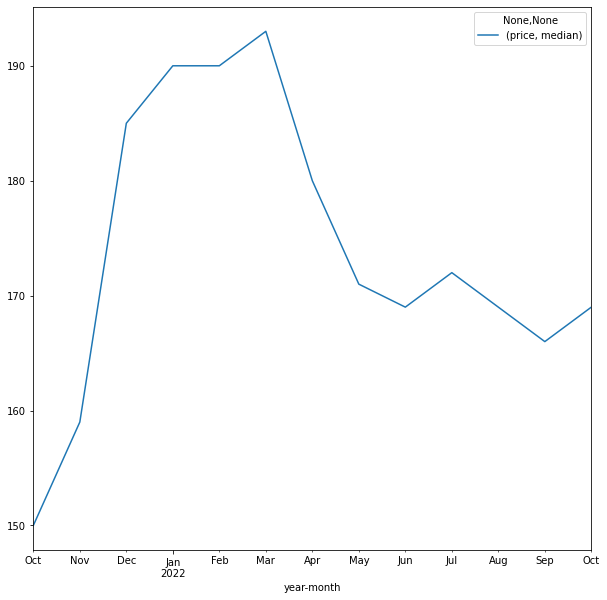

In [19]:
tempcal.plot(kind="line",figsize=(10,10))

#### On average, the highest prices are from Dec-March. 